<a href="https://colab.research.google.com/github/BachTranAnhDuc/Data/blob/master/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Describe Data Wine
Loading the Data¶

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
  
# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [7]:
# First rows of `red`
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Last rows of 'white'
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [9]:
# Take a sample of five rows of 'red'
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
61,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3,5
1153,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6
350,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
452,6.8,0.560,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6


In [10]:
# Describe 'white'
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
# Describe 'red'
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Check for null values in 'red'¶

In [12]:
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Distribution of Alchol
Creating Histogram¶


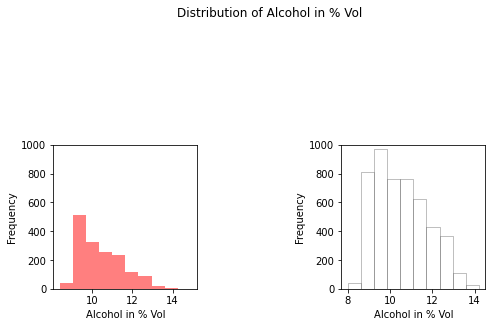

In [13]:
# Create Histogram
fig, ax = plt.subplots(1, 2)
  
ax[0].hist(red.alcohol, 10, facecolor ='red',
              alpha = 0.5, label ="Red wine")
  
ax[1].hist(white.alcohol, 10, facecolor ='white',
           ec ="black", lw = 0.5, alpha = 0.5,
           label ="White wine")
  
fig.subplots_adjust(left = 0, right = 1, bottom = 0, 
               top = 0.5, hspace = 0.05, wspace = 1)
  
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
  
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

Splitting the dataset for training and validation

In [14]:
# Add `type` column to `red` with price one
red['type'] = 1
  
# Add `type` column to `white` with price zero
white['type'] = 0
  
# Append `white` to `red`
wines = red.append(white, ignore_index = True)
  
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)
  
# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.34, random_state = 45)

In [15]:
pip install keras 

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Structure of network¶

In [17]:
# Initialize the constructor
model = keras.Sequential()
  
# Add an input layer
model.add(layers.Dense(12, activation ='relu', input_shape =(11, )))
  
# Add one hidden layer
model.add(layers.Dense(9, activation ='relu'))
  
# Add an output layer
model.add(layers.Dense(1, activation ='sigmoid'))
  

  
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [19]:
# List all weight tensors 
model.get_weights()

[array([[-0.22697943, -0.41552788, -0.01358065,  0.07364917, -0.18175238,
          0.4468096 ,  0.43476123, -0.15350124, -0.2325663 ,  0.03471416,
          0.02947384,  0.08066148],
        [ 0.07965481,  0.4399327 ,  0.0324198 ,  0.05239707, -0.35232735,
         -0.34543666,  0.06882161, -0.17217675, -0.29579896, -0.01442745,
          0.32056677, -0.2191028 ],
        [ 0.25375056,  0.43650115, -0.19348389,  0.46959996, -0.20440331,
          0.06419033, -0.05169272, -0.36233163,  0.07219726,  0.20777982,
         -0.00294375,  0.34980738],
        [ 0.23020363,  0.05476958, -0.333243  , -0.15230152,  0.23878497,
         -0.18778333,  0.16474271, -0.3407059 ,  0.3973168 , -0.16905582,
          0.17035091,  0.0797534 ],
        [-0.02331069, -0.50488997,  0.22372979,  0.14238727, -0.21165308,
          0.2784558 ,  0.3308766 ,  0.3632096 ,  0.02267551,  0.11822963,
         -0.07974538,  0.41935033],
        [-0.17559895, -0.19718447, -0.00987554,  0.04695171, -0.38124776,
      

In [20]:
# Compile the model

# Using binary_crossentropy loss function for the binary classification problem
# Using Adam (Adaptive Moment Estimation) optimization algorithm

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4288/4288 [==============================] - 8s 2ms/step - loss: 0.2080 - accuracy: 0.9335
Epoch 2/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1757 - accuracy: 0.9370
Epoch 3/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1563 - accuracy: 0.9473
Epoch 4/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1334 - accuracy: 0.9557
Epoch 5/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1182 - accuracy: 0.9597
Epoch 6/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1078 - accuracy: 0.9669
Epoch 7/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1074 - accuracy: 0.9662
Epoch 8/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0971 - accuracy: 0.9718
Epoch 9/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0938 - accuracy: 0.9715
Epoch 10/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.086

Training and prediction

In [21]:
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

[[3.5490394e-03]
 [4.1314065e-03]
 [3.5411729e-05]
 ...
 [4.3866336e-03]
 [4.8874021e-03]
 [5.9459391e-05]]


In [22]:
# Compare predicted and observed y values:
y_pred, y_test

(array([[3.5490394e-03],
        [4.1314065e-03],
        [3.5411729e-05],
        ...,
        [4.3866336e-03],
        [4.8874021e-03],
        [5.9459391e-05]], dtype=float32), array([0, 0, 0, ..., 0, 0, 0]))

Evaluating the model

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

70/70 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9783
[0.07567153126001358, 0.9782707095146179]


In [24]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred = y_pred.round()

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1625,   16],
       [  32,  536]])

In [25]:
# Precision 
pre = precision_score(y_test, y_pred)
print(pre)

0.9710144927536232


In [26]:
# Recall
re = recall_score(y_test, y_pred)
print(re)

0.9436619718309859


In [27]:
# F1 score
f1 = f1_score(y_test,y_pred)
print(f1)

0.9571428571428571


In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score

roc  =  roc_auc_score(y_test, y_pred)
acc  =  accuracy_score(y_test, y_pred)

dat = {'Accuracy':[acc], 'Precision':[pre], 'Recall':[re], 'F1-score':[f1], 'ROC':[roc]}

df = pd.DataFrame(data = dat)

df

,Accuracy,Precision,Recall,F1-score,ROC
0,0.978271,0.971014,0.943662,0.957143,0.966956


Model 2

In [29]:
# Initialize the constructor
model2 = keras.Sequential()
  
# Add an input layer
model2.add(layers.Dense(12, activation ='tanh', input_shape =(11, )))
  
# Add one hidden layer
model2.add(layers.Dense(9, activation ='tanh'))
  
# Add an output layer
model2.add(layers.Dense(1, activation ='sigmoid'))
  

  
# Model2 summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                144       
                                                                 
 dense_4 (Dense)             (None, 9)                 117       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model

# Using binary_crossentropy loss function for the binary classification problem
# Using Adam (Adaptive Moment Estimation) optimization algorithm

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model2.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.2148 - accuracy: 0.9270
Epoch 2/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1588 - accuracy: 0.9457
Epoch 3/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1275 - accuracy: 0.9538
Epoch 4/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1085 - accuracy: 0.9643
Epoch 5/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0990 - accuracy: 0.9708
Epoch 6/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1041 - accuracy: 0.9664
Epoch 7/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0921 - accuracy: 0.9701
Epoch 8/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0844 - accuracy: 0.9701
Epoch 9/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0859 - accuracy: 0.9690
Epoch 10/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.080

In [31]:
# Predicting the Value
y_pred2 = model2.predict(X_test)
print(y_pred2)

[[0.00366378]
 [0.00585946]
 [0.00325966]
 ...
 [0.0049879 ]
 [0.00386369]
 [0.00330541]]


In [32]:
score2 = model2.evaluate(X_test, y_test, verbose=1)
print(score2)

70/70 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9783
[0.07754267752170563, 0.9782707095146179]


In [33]:
# Import the modules from `sklearn.metrics`
y_pred2 = y_pred2.round()

# Confusion matrix
confusion_matrix(y_test, y_pred2)

array([[1629,   12],
       [  36,  532]])

In [34]:
pre2 = precision_score(y_test, y_pred2)
re2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test,y_pred2)
roc2  =  roc_auc_score(y_test, y_pred2)
acc2  =  accuracy_score(y_test, y_pred2)

dat2 = {'Accuracy':[acc2], 'Precision':[pre2], 'Recall':[re2], 'F1-score':[f1_2], 'ROC':[roc2]}

df2 = pd.DataFrame(data = dat2)

df2

,Accuracy,Precision,Recall,F1-score,ROC
0,0.978271,0.977941,0.93662,0.956835,0.964654


Model 3¶

In [35]:
# Initialize the constructor
model3 = keras.Sequential()
  
# Add an input layer
model3.add(layers.Dense(12, activation ='relu', input_shape =(11, )))
  
# Add one hidden layer
model3.add(layers.Dense(9, activation ='tanh'))
  
# Add an output layer
model3.add(layers.Dense(1, activation = 'sigmoid'))
  

  
# Model summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                144       
                                                                 
 dense_7 (Dense)             (None, 9)                 117       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model

# Using binary_crossentropy loss function for the binary classification problem
# Using Adam (Adaptive Moment Estimation) optimization algorithm

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model3.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4288/4288 [==============================] - 8s 2ms/step - loss: 0.2393 - accuracy: 0.9214
Epoch 2/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1772 - accuracy: 0.9377
Epoch 3/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1541 - accuracy: 0.9468
Epoch 4/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1226 - accuracy: 0.9592
Epoch 5/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1092 - accuracy: 0.9639
Epoch 6/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1081 - accuracy: 0.9646
Epoch 7/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0970 - accuracy: 0.9694
Epoch 8/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0872 - accuracy: 0.9713
Epoch 9/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.0842 - accuracy: 0.9722
Epoch 10/10
4288/4288 [==============================] - 7s 2ms/step - loss: 0.079

In [37]:
# Predicting the Value
y_pred3 = model3.predict(X_test)
print(y_pred3)

[[0.00073934]
 [0.00385651]
 [0.00065428]
 ...
 [0.00135404]
 [0.00096148]
 [0.00062466]]


In [38]:
score3 = model3.evaluate(X_test, y_test, verbose=1)
print(score3)

70/70 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9728
[0.09304127097129822, 0.9728384017944336]


In [39]:
# Import the modules from `sklearn.metrics`
y_pred3 = y_pred3.round()

# Confusion matrix
confusion_matrix(y_test, y_pred3)

array([[1634,    7],
       [  53,  515]])

In [40]:
pre3 = precision_score(y_test, y_pred3)
re3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test,y_pred3)
roc3  =  roc_auc_score(y_test, y_pred3)
acc3  =  accuracy_score(y_test, y_pred3)

dat3 = {'Accuracy':[acc3], 'Precision':[pre3], 'Recall':[re3], 'F1-score':[f1_3], 'ROC':[roc3]}

df3 = pd.DataFrame(data = dat3)

df3

,Accuracy,Precision,Recall,F1-score,ROC
0,0.972838,0.98659,0.90669,0.944954,0.951212


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1641
           1       0.97      0.94      0.96       568

    accuracy                           0.98      2209
   macro avg       0.97      0.97      0.97      2209
weighted avg       0.98      0.98      0.98      2209



In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_K = lr.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred_K))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1641
           1       0.97      0.94      0.96       568

    accuracy                           0.98      2209
   macro avg       0.97      0.97      0.97      2209
weighted avg       0.98      0.98      0.98      2209



In [46]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_S=svc.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred_S))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1641
           1       0.96      0.80      0.87       568

    accuracy                           0.94      2209
   macro avg       0.95      0.89      0.92      2209
weighted avg       0.94      0.94      0.94      2209



In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1641
           1       0.99      0.98      0.99       568

    accuracy                           0.99      2209
   macro avg       0.99      0.99      0.99      2209
weighted avg       0.99      0.99      0.99      2209

